# Table of Contents
 <p><div class="lev1"><a href="#Measure-Dynamic-Functional-Connectivity-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Measure Dynamic Functional Connectivity</a></div><div class="lev2"><a href="#Initialize-Environment-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Initialize Environment</a></div><div class="lev2"><a href="#Load-CoreData-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Load CoreData</a></div><div class="lev2"><a href="#Compute-Functional-Connectivity-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Compute Functional Connectivity</a></div><div class="lev2"><a href="#Compute-Pearson-Functional-Connectivity-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Compute Pearson Functional Connectivity</a></div><div class="lev3"><a href="#Run-the-Pipeline-(in-Parallel)-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Run the Pipeline (in Parallel)</a></div><div class="lev2"><a href="#Plot-Adjacency-Matrices-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Plot Adjacency Matrices</a></div>

# Measure Dynamic Functional Connectivity

## Initialize Environment

In [50]:
try:
    %load_ext autoreload
    %autoreload 2
    
except:
    print 'NOT IPYTHON'

from __future__ import division
from IPython.display import display

import os
import sys
import glob
import json

import numpy as np
import pandas as pd
import scipy.io as io
import h5py
import matplotlib.pyplot as plt

import scipy.stats as stats

path_CoreData = '/Users/akhambhati/Remotes/hoth_research/CoreData/Sync_Cog_Control-Medaglia'
path_PeriphData = '/Users/akhambhati/Remotes/hoth_research/PeriphData/ds-NMF_CogControl'
path_ExpData = path_PeriphData + '/e01-FuncNetw'

for path in [path_CoreData, path_PeriphData, path_ExpData]:
    if not os.path.exists(path):
        print('Path: {}, does not exist'.format(path))
        os.makedirs(path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load CoreData

In [26]:
df_navon = io.loadmat('{}/NavonBlockedSeriesScale125.mat'.format(path_CoreData), struct_as_record=False)
df_stroop = io.loadmat('{}/StroopBlockedSeriesScale125.mat'.format(path_CoreData), struct_as_record=False)

n_subj = 28
n_fix_block = 12
n_tsk_block = 6
n_roi = 262

## Compute Functional Connectivity

In [88]:
# Process Navon
for subj_id in xrange(n_subj):
    proc_item = '{}/Subject_{}.Navon'.format(path_ExpData, subj_id)
    
    adj_rs_pos = np.zeros((n_tsk_block, n_roi, n_roi))
    adj_rs_neg = np.zeros((n_tsk_block, n_roi, n_roi))    
    adj_lo_pos = np.zeros((n_tsk_block, n_roi, n_roi))
    adj_lo_neg = np.zeros((n_tsk_block, n_roi, n_roi))    
    adj_hi_pos = np.zeros((n_tsk_block, n_roi, n_roi))
    adj_hi_neg = np.zeros((n_tsk_block, n_roi, n_roi))    
    
    cnt = 0
    for fix_block in xrange(0, n_fix_block, 2):
        adj = np.corrcoef(np.vstack((df_navon['data'][subj_id][fix_block+1].NFix,
                                     df_navon['data'][subj_id][fix_block+2].NFix)).T)
        adj_rs_pos[cnt, :, :] = stats.threshold(adj, 0)
        adj_rs_neg[cnt, :, :] = stats.threshold(-1*adj, 0)        
        
        cnt += 1
        
    for tsk_block in xrange(n_tsk_block):
        adj = np.corrcoef(df_navon['data'][subj_id][tsk_block].NS.T)
        adj_lo_pos[tsk_block, :, :] = stats.threshold(adj, 0)
        adj_lo_neg[tsk_block, :, :] = stats.threshold(-1*adj, 0)        
        
        adj = np.corrcoef(df_navon['data'][subj_id][tsk_block].S.T)
        adj_hi_pos[tsk_block, :, :] = stats.threshold(adj, 0)
        adj_hi_neg[tsk_block, :, :] = stats.threshold(-1*adj, 0)        

    np.savez(proc_item,
             adj_rs_pos = adj_rs_pos,
             adj_rs_neg = adj_rs_neg,
             adj_lo_pos = adj_lo_pos,
             adj_lo_neg = adj_lo_neg,
             adj_hi_pos = adj_hi_pos,
             adj_hi_neg = adj_hi_neg)

        
# Process Stroop
for subj_id in xrange(n_subj):
    proc_item = '{}/Subject_{}.Stroop'.format(path_ExpData, subj_id)
    
    adj_rs_pos = np.zeros((n_tsk_block, n_roi, n_roi))
    adj_rs_neg = np.zeros((n_tsk_block, n_roi, n_roi))    
    adj_lo_pos = np.zeros((n_tsk_block, n_roi, n_roi))
    adj_lo_neg = np.zeros((n_tsk_block, n_roi, n_roi))    
    adj_hi_pos = np.zeros((n_tsk_block, n_roi, n_roi))
    adj_hi_neg = np.zeros((n_tsk_block, n_roi, n_roi))    
    
    cnt = 0
    for fix_block in xrange(0, n_fix_block, 2):
        adj = np.corrcoef(np.vstack((df_stroop['data'][subj_id][fix_block+1].SFix,
                                     df_stroop['data'][subj_id][fix_block+2].SFix)).T)
        adj_rs_pos[cnt, :, :] = stats.threshold(adj, 0)
        adj_rs_neg[cnt, :, :] = stats.threshold(-1*adj, 0)        
        
        cnt += 1
        
    for tsk_block in xrange(n_tsk_block):
        adj = np.corrcoef(df_stroop['data'][subj_id][tsk_block].IE.T)
        adj_lo_pos[tsk_block, :, :] = stats.threshold(adj, 0)
        adj_lo_neg[tsk_block, :, :] = stats.threshold(-1*adj, 0)        
        
        adj = np.corrcoef(df_stroop['data'][subj_id][tsk_block].E.T)
        adj_hi_pos[tsk_block, :, :] = stats.threshold(adj, 0)
        adj_hi_neg[tsk_block, :, :] = stats.threshold(-1*adj, 0)        

    np.savez(proc_item,
             adj_rs_pos = adj_rs_pos,
             adj_rs_neg = adj_rs_neg,
             adj_lo_pos = adj_lo_pos,
             adj_lo_neg = adj_lo_neg,
             adj_hi_pos = adj_hi_pos,
             adj_hi_neg = adj_hi_neg)

<matplotlib.colorbar.Colorbar instance at 0x11dc18638>

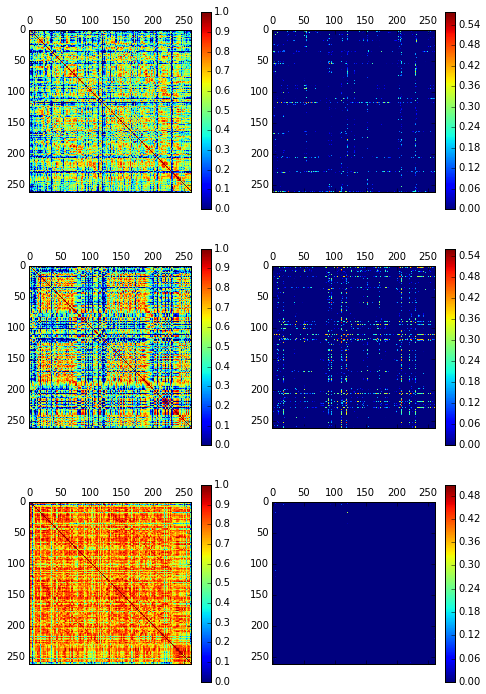

In [80]:
%matplotlib inline

tt = 5
plt.figure(figsize=(8,12))
ax = plt.subplot(3,2,1); mat = ax.matshow(adj_rs_pos[tt, ...]); plt.colorbar(mat, ax=ax)
ax = plt.subplot(3,2,2); mat = ax.matshow(adj_rs_neg[tt, ...]); plt.colorbar(mat, ax=ax)
ax = plt.subplot(3,2,3); mat = ax.matshow(adj_lo_pos[tt, ...]); plt.colorbar(mat, ax=ax)
ax = plt.subplot(3,2,4); mat = ax.matshow(adj_lo_neg[tt, ...]); plt.colorbar(mat, ax=ax)
ax = plt.subplot(3,2,5); mat = ax.matshow(adj_hi_pos[tt, ...]); plt.colorbar(mat, ax=ax)
ax = plt.subplot(3,2,6); mat = ax.matshow(adj_hi_neg[tt, ...]); plt.colorbar(mat, ax=ax)